# logistic Regression

#### classification Algorithm



spam vs no spam

input: bunch of words 
    
output:probability spam or not

    

#### basic Comparision


Linear regression: Multiplication

input [1] ..output:2
input [2] ..output:4
model the relation y=2x

Logistic regression: Spam
    probability [0,1] give input belongnin to a class
    
    return the probability of spam



# problem of Linear Regression for classification

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
# determine if it is fever according to temperature
x=[1,5,10,10,25,50,70,75,100,]
y=[0,0,0,0,0,1,1,1,1]
colors=np.random.rand(len(x))
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()



<Figure size 640x480 with 1 Axes>

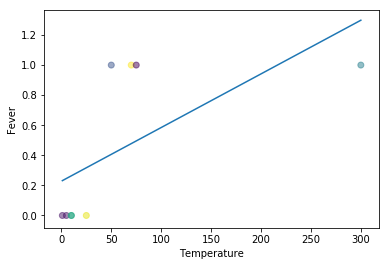

In [3]:
# after introducing outliers linear regression is destroyed 
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [4]:
# linear function y=ax+b        Logistic function S=g(y)              Cross entropy function D(S,L)
# input      ->        Logits            ->               softmax            ->                 True Labels




# Logistic regression can solve the classification 

# Logistic Function g()

# y=Ax+b

# g(y)=1/(1+e^-y)=1/1+e^-(Ax+b)

# g(y)=Estimated probability that y=1 given x









# Softmax Function g()


# Multi-class logistic regression(complicated)

# Generalization of logistic function


# cross entropy function()

# D(S,L)=LlogS-(1-L)log(1-S)

# if L=0(label) not spam
#     D(S,0)=-log(1-S)
#         -log(1-s):less positive if s->0
#         -log(1-s):more positive if s->1 biggerloss

# if L=1(label) spam
#     D(s,1)=logS
#         logS:less negative if S->1
#         logS:more negativeif S->0 bigger loss















#### Cross Entropy Loss 


Goal: minimizing cross entropy loss
    
L=1/N segmai D(g(Axi+b),Li)

# building a logistic Regresion model with pytorch



load dataset

make it iterable

create model class

instantiate model class

instantiate loss class

instantiate optimizer class

train model

# Step 1 loading MNIST Train Dataset
### images from 1-9

In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [6]:
# save the data in current folder and create data folder
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
#don't have to download it second time

In [7]:
len(train_dataset)

60000

In [8]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
type(train_dataset[0])

tuple

In [10]:
#input Matrix 
train_dataset[0][0].size()
# image of   28*28 width and height 

torch.Size([1, 28, 28])

In [11]:
#label
train_dataset[0][1]

tensor(5)

# Displaying MNIST

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [14]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

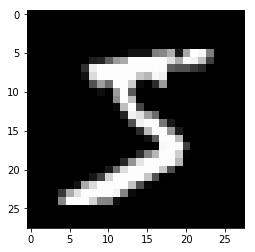

In [15]:
plt.imshow(show_img, cmap='gray')

In [16]:
# Label
train_dataset[0][1]

tensor(5)

In [17]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

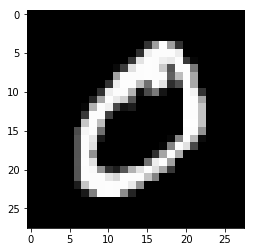

In [18]:
plt.imshow(show_img, cmap='gray')

In [19]:
# Label
train_dataset[1][1]

tensor(0)

# step 1b: Loading MNIST TEST Dataset

evalute the performance of our models

determine if it's overfitting

In [20]:
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [21]:
len(test_dataset)

10000

In [88]:

type(test_dataset[0])


tuple

In [23]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

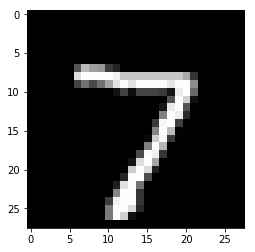

In [24]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [25]:

# Label
test_dataset[0][1]

tensor(7)

# step 2  make dateset iterable  

In [26]:
# make dateset iterable 

# totaldata:60000
# minibatch:100
#     number of examples in 1 iteration
# iterations:3000
#     1 iterations: one mini-batch forward&backward pass
# epochs 
#     1 epoch running through the whole data set once
#     epochs =iterations / (totaldata/minibatch)=5
    
    
# going 60000*5 times which means 100 images one iterations *3000

In [27]:
len(train_dataset)

60000

In [28]:
batch_size = 100

In [29]:
n_iters = 3000

In [30]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

create Iterable obejct:traning Dataset


In [31]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
#the second epochs shuffle to preveting overfting 

check Iterability

In [32]:
import collections
isinstance(train_loader,collections.Iterable)

True

### Create Iterable Object:testing DataSet

In [33]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)
# only need to do one single forward pass

In [34]:
isinstance(test_loader,collections.Iterable)

True

#### Main aim: Iterate Through Dateset

In [35]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]


In [36]:
# Need to iterate
# Think of numbers as the images
for i in lst:
    print(i.shape)

(28, 28)
(28, 28)


# Step 3: Buildign Model

In [37]:

# Same as linear regression!
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
# we pass in x and get y pass it to softmax then we get the probability        
    def forward(self, x):
        out = self.linear(x)
        return out


# Step 4 : Instantiate Model class
    

In [38]:
#input dimension:
#28*28=784
#outut dimension:
#0,1,2..9


In [39]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

# step 5 Instantiate Loss class
    
        

In [40]:
# Logistic Regression:cross Entropy Loss
#     Linear Regression:MSE
        

In [41]:
criterion=nn.CrossEntropyLoss()
#computes softmax and cross entropy 

# step instantiate optimizer class


In [42]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
print(model.parameters())
# t
print(len(list(model.parameters())))

# FC 1 Parameters alpha 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters beta
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x0000029FFFE1FB88>
2
torch.Size([10, 784])
torch.Size([10])


In [44]:
#                 matrix  size
#                   A1       B1   
#                 10*784    10*1

# (784*1)           A1X1+B1        
# Input size --------------------> outputsize   
#   784                              10
    
    
    
    
    
    
    
    
#       (10,784)*(784,1)+(10,1)=(10,1)  

# step 7:Train Model

In [45]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        # don't need to convert to tensor because image are already torch tensor
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits 
        outputs = model(images)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # Calculate Accuracy every 500 iteration
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                #resize to 28*28
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                # output is an variable so we need to use .data
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
   # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            # Print Loss
            print("Iteration: {}. Loss: {}. Accuracy: {}".format(iter, loss.data[0], accuracy)) 

C:\Users\G2945\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 500. Loss: 1.8745571374893188. Accuracy: 70
Iteration: 1000. Loss: 1.564401388168335. Accuracy: 78
Iteration: 1500. Loss: 1.360158085823059. Accuracy: 80
Iteration: 2000. Loss: 1.1127443313598633. Accuracy: 81
Iteration: 2500. Loss: 1.07394278049469. Accuracy: 82
Iteration: 3000. Loss: 0.9678703546524048. Accuracy: 83


# break down accuracy Calculation

In [46]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    #linear output 
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([[-0.3290, -0.9783, -0.3856, -0.1465,  0.2512, -0.4190, -1.0788,  2.7814,
         -0.4475,  0.8114],
        [ 0.6130,  0.1694,  1.8327,  1.2055, -1.7725,  0.9543,  1.4703, -1.8003,
          0.3904, -1.4543],
        [-0.7873,  2.2474,  0.2105,  0.0337, -0.6704, -0.2567, -0.1240, -0.3044,
          0.1450, -0.3584],
        [ 2.7719, -2.3281, -0.1134, -0.2797, -0.9663,  0.6314,  1.2025,  0.2641,
         -0.4612, -0.3957],
        [-0.2065, -2.0516,  0.3794, -0.7357,  1.8064, -0.4303,  0.1712,  0.3571,
          0.0088,  0.8874],
        [-1.1618,  2.8283,  0.1720,  0.0580, -0.6453, -0.3704, -0.6090, -0.1311,
          0.4963, -0.1204],
        [-1.1454, -1.0912, -0.7058,  0.1371,  1.3794,  0.2001, -0.7668,  0.6627,
          0.4334,  0.7965],
        [-1.2640, -0.1940, -0.5859,  0.0478,  0.7776,  0.2826,  0.1977, -0.1446,
          0.4130,  1.2959],
        [ 0.2199, -0.6242,  0.9690, -1.2986,  0.5848,  0.0929,  0.9773, -0.6573,
          0.1003,  0.1043],
        [-0

          0.1575,  2.3124]], grad_fn=<ThAddmmBackward>)


In [48]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    #linear output 
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)
    # it is [100,10] because the batch is 100 images and each batch with 10 perdictions

OUTPUTS
torch.Size([100, 10])


In [49]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    #linear output 
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        #to get all 10 perdictions from the first images 
        print(outputs[0,:])
    _, predicted = torch.max(outputs.data, 1)
    #number 7 digit has the largest perdiction

OUTPUTS
tensor([-0.3290, -0.9783, -0.3856, -0.1465,  0.2512, -0.4190, -1.0788,  2.7814,
        -0.4475,  0.8114], grad_fn=<SelectBackward>)


In [50]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted.size())
        # it is [100,1] because we have maximum value for each images (total is 100 if them)

PREDICTION
torch.Size([100])


In [51]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])
    # the prediction is digit 7

PREDICTION
tensor(7)


In [52]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])
        
        print('LABEL SIZE')
        print(labels.size())
        
        print('LABEL FOR IMAGE 0')
        print(labels[0])
        # compare with the label and they are the same

PREDICTION
tensor(7)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 0
tensor(7)


In [53]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[1])
        
        print('LABEL SIZE')
        print(labels.size())
        
        print('LABEL FOR IMAGE 1')
        print(labels[1])
        
# show the model is doing well in first two images

PREDICTION
tensor(2)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 1
tensor(2)


In [86]:
correct = 0
total = 0
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    # Total number of labels
    # total 
    print(predicted.size())
    total += labels.size(0)
    
    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * (correct.float() / total)

print(accuracy)
print(iter_test)
print(labels.size(0))
print(correct)
print(total)

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 7, 0, 0, 9, 0, 1, 3, 9, 7, 3, 4, 7, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 3, 3, 2,
        4, 4, 6, 3, 5, 3, 2, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 9, 2, 4, 3, 0, 7, 0,
        2, 8, 1, 7, 3, 7, 1, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 8, 3, 1, 4,
        1, 1, 6, 9])
tensor([6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 1, 3, 9, 7, 9, 4, 4, 9, 7, 3, 6, 7, 6,
        4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2,
        0, 6, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 3, 4, 4, 1, 4, 4, 7,
        3, 3, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 3, 9, 2, 3, 0, 1, 1, 3, 0, 9, 0, 8,
        1, 6, 4, 2])
tensor([3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 1, 9, 0, 3, 5, 7, 5, 7, 2, 2, 7,
        1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 3, 3, 8, 4, 2, 6, 0, 2,
        4, 2, 9, 1, 9, 5, 7, 7, 1, 1, 2, 0, 8, 1, 7, 7, 3, 1, 8, 1, 3, 0, 3, 0,
        1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 3, 4, 2, 9, 2, 0, 4

        2, 9, 4, 4])
tensor([1, 3, 3, 2, 1, 7, 0, 9, 6, 4, 1, 3, 8, 1, 4, 6, 2, 2, 5, 1, 3, 7, 3, 7,
        1, 3, 3, 0, 9, 1, 4, 0, 6, 3, 3, 2, 0, 4, 9, 7, 0, 1, 0, 8, 9, 5, 5, 7,
        9, 3, 8, 3, 8, 1, 5, 3, 9, 0, 5, 3, 6, 8, 6, 7, 1, 7, 3, 7, 0, 3, 9, 0,
        2, 1, 7, 3, 1, 7, 2, 8, 6, 5, 7, 3, 8, 9, 3, 3, 7, 0, 1, 7, 0, 0, 3, 7,
        2, 8, 2, 1])
tensor([8, 6, 2, 9, 3, 7, 5, 8, 1, 6, 8, 8, 1, 4, 8, 4, 3, 8, 3, 0, 6, 2, 7, 3,
        3, 2, 1, 0, 2, 3, 4, 6, 3, 9, 3, 4, 8, 9, 0, 3, 8, 0, 7, 6, 5, 4, 7, 3,
        0, 0, 8, 6, 2, 5, 1, 1, 0, 0, 8, 8, 0, 1, 2, 3, 2, 1, 7, 8, 0, 2, 8, 7,
        6, 9, 1, 4, 1, 6, 4, 2, 4, 3, 5, 4, 7, 9, 5, 0, 1, 3, 8, 8, 9, 1, 9, 6,
        9, 9, 5, 2])
tensor([7, 4, 6, 0, 1, 1, 1, 0, 4, 4, 7, 6, 3, 8, 0, 9, 3, 0, 6, 1, 9, 6, 1, 3,
        8, 1, 2, 5, 2, 2, 4, 3, 6, 0, 1, 9, 7, 6, 6, 8, 7, 2, 9, 8, 8, 3, 1, 0,
        0, 7, 8, 0, 2, 1, 6, 9, 3, 1, 3, 6, 8, 0, 6, 0, 0, 0, 6, 3, 5, 9, 6, 9,
        1, 5, 8, 5, 3, 0, 4, 0, 3, 9, 6, 8, 2, 3, 1, 2, 1

        9, 6, 6, 2])
tensor([7, 9, 5, 1, 3, 2, 4, 3, 6, 1, 4, 4, 4, 7, 2, 8, 4, 1, 9, 9, 2, 7, 8, 0,
        1, 3, 6, 1, 1, 4, 1, 1, 1, 5, 6, 0, 7, 0, 7, 3, 3, 2, 3, 7, 2, 9, 4, 9,
        8, 1, 3, 1, 5, 1, 8, 7, 4, 0, 0, 0, 8, 2, 2, 4, 1, 2, 1, 9, 7, 2, 7, 3,
        1, 3, 4, 9, 4, 1, 7, 3, 6, 3, 8, 3, 1, 6, 8, 6, 9, 9, 1, 7, 0, 7, 7, 3,
        3, 2, 9, 0])
tensor([3, 4, 9, 8, 4, 1, 0, 6, 0, 4, 6, 8, 6, 1, 1, 4, 8, 9, 2, 3, 8, 5, 9, 4,
        2, 1, 9, 4, 3, 9, 6, 0, 4, 0, 6, 0, 1, 2, 2, 4, 7, 8, 9, 0, 1, 2, 2, 4,
        7, 8, 9, 0, 1, 2, 3, 4, 8, 6, 7, 8, 9, 8, 3, 4, 7, 1, 6, 2, 1, 0, 4, 7,
        1, 9, 3, 8, 4, 7, 2, 0, 9, 1, 4, 1, 4, 6, 9, 0, 6, 2, 1, 1, 1, 1, 7, 2,
        4, 7, 5, 2])
tensor([4, 4, 5, 8, 4, 2, 4, 7, 0, 0, 7, 1, 1, 1, 7, 6, 6, 6, 8, 2, 2, 7, 7, 4,
        0, 2, 4, 2, 1, 8, 9, 6, 1, 0, 6, 4, 6, 9, 8, 0, 2, 0, 8, 2, 9, 6, 8, 0,
        1, 2, 3, 4, 5, 6, 7, 0, 1, 3, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
        7, 8, 5, 4, 9, 9, 4, 7, 7, 3, 9, 8, 8, 3, 1, 5, 8

        7, 8, 9, 1])
tensor([7, 4, 8, 1, 3, 6, 5, 7, 2, 8, 6, 3, 3, 8, 6, 5, 4, 0, 9, 1, 7, 2, 9, 1,
        5, 1, 3, 2, 2, 3, 0, 6, 4, 3, 7, 6, 9, 0, 4, 8, 1, 4, 0, 6, 1, 2, 6, 9,
        2, 2, 3, 5, 5, 1, 6, 7, 7, 9, 6, 2, 9, 4, 7, 0, 2, 8, 4, 0, 0, 8, 8, 8,
        3, 1, 3, 7, 4, 9, 8, 8, 9, 6, 9, 8, 9, 0, 2, 6, 5, 6, 7, 4, 7, 3, 8, 1,
        3, 5, 3, 1])
tensor([2, 3, 8, 8, 6, 1, 2, 3, 4, 6, 0, 1, 2, 8, 5, 6, 7, 8, 1, 7, 2, 4, 8, 8,
        1, 4, 9, 6, 8, 4, 5, 3, 2, 8, 8, 3, 8, 1, 6, 7, 0, 6, 1, 6, 8, 7, 0, 8,
        0, 0, 8, 8, 0, 1, 8, 8, 4, 2, 3, 8, 7, 6, 9, 1, 9, 0, 6, 7, 8, 2, 3, 8,
        2, 8, 1, 5, 2, 7, 3, 3, 1, 8, 2, 2, 3, 0, 2, 9, 4, 9, 2, 0, 7, 7, 4, 1,
        9, 2, 3, 9])
tensor([8, 3, 8, 6, 2, 0, 0, 1, 2, 3, 4, 0, 6, 7, 0, 9, 0, 1, 2, 3, 4, 2, 6, 7,
        0, 7, 0, 1, 2, 3, 4, 2, 6, 7, 8, 9, 0, 0, 7, 2, 6, 2, 1, 3, 7, 3, 6, 6,
        6, 6, 4, 3, 8, 8, 3, 0, 1, 9, 2, 3, 4, 1, 9, 1, 2, 7, 0, 1, 3, 8, 2, 9,
        2, 7, 4, 2, 6, 5, 5, 4, 4, 1, 1, 1, 7, 6, 8, 8, 1

        2, 3, 6, 1])
tensor([6, 9, 5, 2, 0, 1, 2, 3, 4, 1, 6, 7, 1, 9, 0, 1, 0, 3, 4, 0, 6, 7, 8, 9,
        0, 1, 0, 3, 4, 6, 6, 7, 1, 8, 7, 1, 6, 1, 8, 0, 4, 4, 3, 7, 1, 2, 7, 5,
        8, 6, 3, 0, 0, 0, 1, 8, 6, 0, 3, 8, 1, 0, 3, 0, 4, 7, 4, 7, 0, 9, 0, 7,
        1, 7, 1, 6, 6, 0, 6, 0, 1, 7, 6, 4, 9, 9, 5, 3, 7, 4, 3, 0, 1, 6, 6, 1,
        1, 3, 2, 1])
tensor([0, 0, 1, 2, 3, 4, 7, 8, 4, 0, 1, 8, 3, 4, 1, 6, 7, 1, 0, 1, 2, 3, 4, 7,
        8, 9, 6, 8, 3, 9, 5, 1, 8, 6, 8, 6, 1, 7, 1, 7, 3, 5, 6, 9, 1, 1, 1, 8,
        1, 2, 0, 7, 7, 1, 8, 8, 7, 8, 3, 7, 3, 4, 6, 8, 7, 0, 4, 8, 7, 7, 5, 4,
        3, 4, 8, 8, 1, 1, 1, 2, 8, 3, 3, 1, 7, 0, 6, 1, 6, 3, 4, 4, 8, 8, 7, 7,
        1, 0, 1, 7])
tensor([8, 9, 0, 1, 0, 7, 4, 8, 6, 7, 8, 0, 8, 2, 9, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        4, 7, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 0, 6, 3, 5, 8, 9, 1, 4,
        0, 6, 1, 0, 0, 0, 0, 8, 1, 7, 7, 3, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 3, 2,
        4, 4, 4, 2, 6, 4, 1, 7, 2, 6, 2, 0, 1, 7, 8, 4, 5

In [65]:
# Explaining .sum() python built-in function
# correct += (predicted == labels).sum()
import numpy as np
a = np.ones((10))
print(a)
b = np.ones((10))
print(b)

print(a == b)
print((a == b).sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
10


In [66]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')